# Imports and Functions

In [1]:
from sunlab.environment.base.cpu import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *

In [7]:
model = load_aae(FILES['PRETRAINED_MODEL_DIR'], MaxAbsScaler)

# Runtime Parameters

In [11]:
SAVE_EXTRAS = False

In [6]:
g_Base = lambda *args: DIR_ROOT + f"Figures/Model/Theory/"

# Results

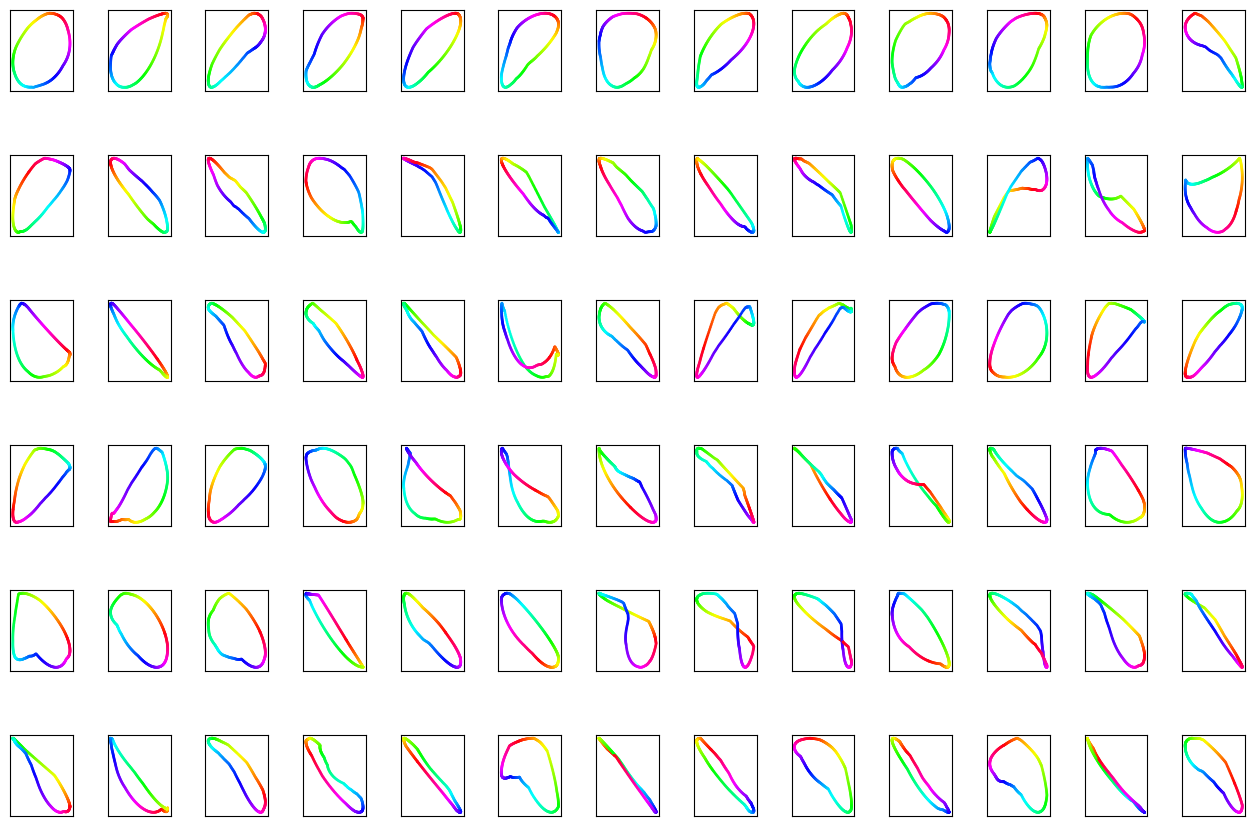

In [10]:
from itertools import combinations
# fig, ax = plt.subplots(9,9,sharex='all',sharey='all')
fig, ax = plt.subplots(6, 13, figsize=(13,9))
combos = combinations(range(13),2)
ax = ax.flatten()
for idx,combo in enumerate(combos):
    if combo[0] == combo[1]:
        continue
    _INDEX = combo
    T = np.linspace(0, 2*np.pi, 300)
    C = np.zeros((T.shape[0],13))
    C[:,_INDEX[0]] = (np.cos(T)+1)/2
    C[:,_INDEX[1]] = (np.sin(T)+1)/2
    XY = model.encoder(C).numpy()
    ax[idx].scatter(XY[...,0], XY[...,1], c=range(XY.shape[0]), cmap='hsv', s=1)
#     ax[idx].set_xlabel(f'{rho_datasets[0].data_columns[_INDEX[0]]:.6}\n{rho_datasets[0].data_columns[_INDEX[1]]:.6}')
    ax[idx].set_xlabel(f'{_INDEX[0]}-{_INDEX[1]}')
for idx in range(len(ax)):
    ax[idx].set_xticks([],[])
    ax[idx].set_yticks([],[])
#     plt.apply_boundary(_plt=ax[idx])
plt.tight_layout()
if SAVE_EXTRAS:
    plt.save(g_Base() + "/circles", tighten=False)

In [ ]:
from itertools import combinations
# fig, ax = plt.subplots(9,9,sharex='all',sharey='all')
fig, ax = plt.subplots(6, 13, figsize=(13,6))
combos = combinations(range(13),2)
ax = ax.flatten()
for idx,combo in enumerate(combos):
    if combo[0] == combo[1]:
        continue
    _INDEX = combo
    T = np.linspace(0, 2*np.pi, 400)
    C = np.zeros((T.shape[0],13))
    C[T.shape[0]//4*0:T.shape[0]//4*1, _INDEX[0]] = np.linspace(0,1,T.shape[0]//4)

    C[T.shape[0]//4*1:T.shape[0]//4*2, _INDEX[0]] = 1
    C[T.shape[0]//4*1:T.shape[0]//4*2, _INDEX[1]] = np.linspace(0,1,T.shape[0]//4)

    C[T.shape[0]//4*2:T.shape[0]//4*3, _INDEX[0]] = np.linspace(1,0,T.shape[0]//4)
    C[T.shape[0]//4*2:T.shape[0]//4*3, _INDEX[1]] = 1

    C[T.shape[0]//4*3:T.shape[0]//4*4, _INDEX[1]] = np.linspace(1,0,T.shape[0]//4)
    XY = model.encoder(C).numpy()
    ax[idx].scatter(XY[...,0], XY[...,1], c=range(XY.shape[0]), cmap='hsv', s=1)
for idx in range(len(ax)):
    ax[idx].set_xticks([],[])
    ax[idx].set_yticks([],[])
#     plt.apply_boundary(_plt=ax[idx])

# END